In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
import scipy.spatial.distance as dist
from scipy.stats import chi2_contingency
from sympy import *

In [2]:
#Code to disable scrolling

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## IQR and Five point summary

In [4]:
def calc_five_point_summary(data):
    data = sorted(data)
    print(f'Data: {data}\n')
    print(f'Minimum: {min(data)}')
    if len(data)%2 != 0:
        Q1 = np.percentile(data, 25, interpolation = 'lower')
        Q3 = np.percentile(data, 75, interpolation = 'higher')
    else:
        Q1 = np.percentile(data, 25, interpolation = 'midpoint')
        Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    print(f'Quartile (Q1): {Q1}')
    median = np.median(data)
    print(f'Median: {median}')
    
    print(f'Quartile (Q3): {Q3}')
    print(f'Maximum: {max(data)}')
    IQR = Q3 - Q1
    print(f'IQR = Q3 - Q1: {IQR}')
    high_value = Q3 + 1.5 *IQR
    low_value = Q1 - 1.5*IQR
    print(f'High value = Q3 + 1.5 * IQR : {high_value}')
    print(f'Low value = Q1 - 1.5 * IQR : {low_value}')
    outliers = [x for x in data if x > high_value or x < low_value]
    print(f'Value less than {low_value} greater than {high_value} are outliers')
    print(f'The outliers are {outliers}')
    plt.boxplot(data)


In [5]:
data = [3,3,3,4,4,4,4,4,6,12,18]

Data: [3, 3, 3, 4, 4, 4, 4, 4, 6, 12, 18]

Minimum: 3
Quartile (Q1): 3
Median: 4.0
Quartile (Q3): 6
Maximum: 18
IQR = Q3 - Q1: 3
High value = Q3 + 1.5 * IQR : 10.5
Low value = Q1 - 1.5 * IQR : -1.5
Value less than -1.5 greater than 10.5 are outliers
The outliers are [12, 18]


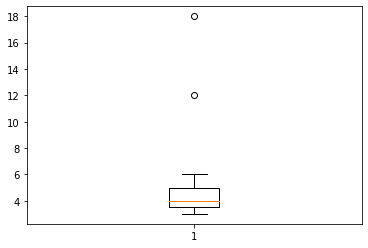

In [6]:
calc_five_point_summary(data)

In [8]:
IQR = stats.iqr(data )
  
print(IQR)

1.5


## Confusion Matrix

In [9]:
pred = ['X','X','X','Y','Y','Y','Z','Z','Z','Z']
act = ['X','X','Z','Y','Y','Y','X','X','X','Z']

In [10]:
confusion_matrix(act, pred)

array([[2, 0, 3],
       [0, 3, 0],
       [1, 0, 1]], dtype=int64)

In [11]:
print(precision_recall_fscore_support(act, pred))

(array([0.66666667, 1.        , 0.25      ]), array([0.4, 1. , 0.5]), array([0.5       , 1.        , 0.33333333]), array([5, 3, 2], dtype=int64))


In [12]:
print(classification_report(act, pred))

              precision    recall  f1-score   support

           X       0.67      0.40      0.50         5
           Y       1.00      1.00      1.00         3
           Z       0.25      0.50      0.33         2

    accuracy                           0.60        10
   macro avg       0.64      0.63      0.61        10
weighted avg       0.68      0.60      0.62        10



## Chi Square test

In [125]:

# defining the table
# data = [[60, 40], [54, 44],[46,53],[41,57]]
data = [[250,200], [50,1000]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05

print(stat, p, dof, expected)

print (f'\ndof:\n{dof}')
print (f'\nExpected:\n{expected}')

display(Eq(Symbol('chi^2'), Symbol(f'\u03A3(observed-expected)^{{{2}}}')/Symbol('expected')))
display(Eq(Symbol('chi^2'), stat))
print("\np value is " + str(p))

if p <= alpha:
    print('p value is less than alpha. So variables are dependent (reject H0)')
else:
    print('p value is greater than alpha. So variables are independent (H0 holds true)')

504.76686507936506 8.725823025133513e-112 1 [[ 90. 360.]
 [210. 840.]]

dof:
1

Expected:
[[ 90. 360.]
 [210. 840.]]


Eq(chi^2, Σ(observed-expected)^{2}/expected)

Eq(chi^2, 504.766865079365)


p value is 8.725823025133513e-112
p value is less than alpha. So variables are dependent (reject H0)


## Creating contingency table/crosstab

In [85]:
df1 = pd.DataFrame({'Order': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'Product': ['TV', 'TV', 'Comp', 'TV', 'TV', 'Comp',
                               'Comp', 'Comp', 'TV', 'Radio', 'TV', 'Radio', 'Radio',
                               'Radio', 'Comp', 'Comp', 'TV', 'TV', 'Radio', 'TV'],
                   'Country': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                               'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']})


In [86]:
df1

,Order,Product,Country
0,1,TV,A
1,2,TV,A
2,3,Comp,A
3,4,TV,A
4,5,TV,B
5,6,Comp,B
6,7,Comp,B
7,8,Comp,B
8,9,TV,B
9,10,Radio,B


In [87]:
# creating contingency table/crosstab
data_crosstab = pd.crosstab(df1['Product'],
                            df1['Country'], 
                               margins = False)
print(data_crosstab)

Country  A  B  C
Product         
Comp     1  3  2
Radio    0  2  3
TV       3  3  3


## Correlation

In [14]:
X = [2, 6, 7]
Y = [27, 20, 13]

In [15]:
np.corrcoef(X,Y)

array([[ 1.        , -0.94491118],
       [-0.94491118,  1.        ]])

## Distance calculation

In [16]:
#supremum
dist.chebyshev((21, 12, 3, 17, 48, 11, 82, 41, 35),  (34, 5, 13, 3, 57, 26, 69, 55, 27))

15

In [109]:
##euclidean
dist.euclidean((21, 12, 3, 17, 48, 11, 82, 41, 35),  (34, 5, 13, 3, 57, 26, 69, 55, 27))

35.34119409414458

In [108]:
#manhattan
a = (21, 12, 3, 17, 48, 11, 82, 41, 35)
b = (34, 5, 13, 3, 57, 26, 69, 55, 27)

sum([abs(i-j) for i,j in zip(a,b)])

103

In [100]:
def minkowski(a,b,order):
    return round(sum([abs(i-j)**order for i,j in zip(a,b)])**(1/order),2)

In [110]:
a=(21, 12, 3, 17, 48, 11, 82, 41, 35)
b=(34, 5, 13, 3, 57, 26, 69, 55, 27)
minkowski(a,b,2)

35.34

### Cosine Similarity

In [77]:
def cos_similarity(a,b):
    a = np.array(a)
    b = np.array(b)
    return a @ b/ (np.linalg.norm(a)* np.linalg.norm(b))

In [78]:
a = (21, 12, 3, 17, 48, 11, 82, 41, 35)
b = (34, 5, 13, 3, 57, 26, 69, 55, 27)
cos_similarity(a,b)

0.9537803748418658

## Dissimilarity Matrix

In [ ]:
def cal_dissimilarity_matrix(data, dissimilarity_type):
    

## Min Max scaling

In [47]:
def min_max_scale(data, min_new = 0, max_new = 1):
    arr = np.array(data)
    min_old = arr.min()
    max_old = arr.max()
    display(Eq(Symbol('Min_old'), min_old))
    display(Eq(Symbol('Max_old'), max_old))
    display(Eq(Symbol('Min_new'), min_new))
    display(Eq(Symbol('Max_new'), max_new))
    display(Eq(Symbol("v^'"), Symbol('v - Min_old')/Symbol('Max_{old} - Min_{old}')*Symbol('Max_{new} - Min_{new}') + Symbol('Min_new')))
    arr_new = (arr - min_old)/(max_old-min_old)*(max_new-min_new) + min_new
    print('Final output:')
    return list(np.round(arr_new, 3))

In [48]:
marks = [57, 67,77,87, 61, 45, 32, 56, 71, 78]

In [49]:
min_max_scale(marks, 55, 100)

Eq(Min_old, 32)

Eq(Max_old, 87)

Eq(Min_new, 55)

Eq(Max_new, 100)

Eq(v^', Max_{new} - Min_{new}*v - Min_old/Max_{old} - Min_{old} + Min_new)

Final output:


[75.455, 83.636, 91.818, 100.0, 78.727, 65.636, 55.0, 74.636, 86.909, 92.636]

## Z-score normalization

In [45]:
def z_score(data):
    arr = np.array(data)
    mean = np.mean(arr)
    std = np.std(arr)
    display(Eq(Symbol('mu'), mean))
    display(Eq(Symbol('sigma'), std))
    
    display(Eq(Symbol("v^'"), Symbol('v - \u03BC')/Symbol('sigma')))
    arr_new = (arr - mean)/std
    print('Final output:')
    return list(np.round(arr_new, 3))

In [46]:
marks = [57, 67,77,87, 61, 45, 32, 56, 71, 78]
z_score(marks)

Eq(mu, 63.1)

Eq(sigma, 15.655350523064)

Eq(v^', v - μ/sigma)

Final output:


[-0.39, 0.249, 0.888, 1.527, -0.134, -1.156, -1.987, -0.454, 0.505, 0.952]

## Binning methods for data smoothening

In [97]:
def apply_binning(input_data, n_bins):
    input_data = sorted(input_data)
    print(f'Sorted input data: {input_data}')
    print(f'\nNo of bins: {n_bins}')
    
    print(f'\nPartition into equal-frequency bins:')
    partition_size = len(input_data)//n_bins
    partition_index = 0
    partitions = []
    while partition_index <= len(input_data) -partition_size:
        partitions.append(input_data[partition_index:partition_index + partition_size])
        partition_index +=partition_size
    partition_index -=partition_size
    #print(input_data[partition_index + partition_size:])
    if len(input_data[partition_index + partition_size:]) >0:
        
        partitions[-1].extend(input_data[partition_index + partition_size:])
        
    for i, partition in enumerate(partitions):
        print(f'Bin {i+1}: {partition}')
    
    print('\nSmoothening by bin means:')
    for i, partition in enumerate(partitions):
        print(f'Bin {i+1}: {[round(np.mean(partition),3) for x in partition]}')
    
    print('\nSmoothening by bin boundaries:')
    for i, partition in enumerate(partitions):
        boundary_l = min(partition)
        boundary_r = max(partition)
        print(f'Bin {i+1}: {[boundary_l if abs(x-boundary_l) < abs(boundary_r-x) else boundary_r for x in partition]}')

In [99]:
apply_binning(input_data=[57, 67,77, 61, 45, 32, 56, 71, 78], n_bins=3)

Sorted input data: [32, 45, 56, 57, 61, 67, 71, 77, 78]

No of bins: 3

Partition into equal-frequency bins:
Bin 1: [32, 45, 56]
Bin 2: [57, 61, 67]
Bin 3: [71, 77, 78]

Smoothening by bin means:
Bin 1: [44.333, 44.333, 44.333]
Bin 2: [61.667, 61.667, 61.667]
Bin 3: [75.333, 75.333, 75.333]

Smoothening by bin boundaries:
Bin 1: [32, 56, 56]
Bin 2: [57, 57, 67]
Bin 3: [71, 78, 78]


### Foil gain and Likelyhood ratio for rule based classification

In [26]:
def foil_gain(p_0, n_0, p_1, n_1):
    return p_1*(np.log2(p_1/(n_1+p_1)) - np.log2(p_0/(n_0+p_0)))

In [29]:
foil_gain(100,400,30,10)

57.206717868255545